# Data Diri


```
Nama     : Indra Cahya Ramdani 
Username : indracahyaramdani
Email    : indracahyaramdani@gmail.com
Domisili : Kabupaten Bantul
Institusi: Universitas Ahmad Dahlan
Pekerjaan: Mahasiswa

```


# Import Librarry dan Data Set

## Import Librarry

In [ ]:
import tensorflow as tf                                                           #Mengimpor modul tensorflow 
import keras_preprocessing                                                        #Mengimpor modul keras 
from keras_preprocessing import image                                             #Mengimpor keras_preprocessing untuk gambar  
from keras_preprocessing.image import ImageDataGenerator                          #Mengimpor Image Generator
import time                                                                       #Mengimpor times
import matplotlib.pyplot as plt   
import zipfile, os         

## Download Data Set Dari Resource

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-14 03:00:56--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.34MB/s    in 3m 51s  

2021-04-14 03:04:49 (1.33 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## Extrak Data di tmp

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir(base_dir)

['rock', 'paper', 'scissors', 'README_rpc-cv-images.txt']

# Augmentasi dan Pemisahan Data 

## Augmentasi Gambar

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

## Pemisahan data Train dan Validation

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150), 
        #class_mode='sparse',
        shuffle=True,
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        #class_mode='sparse',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Membangun Jaringan Saraf Tiruan CNN

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(192, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 64)       1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 70, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 33, 128)       147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 31, 192)       2

## Melakukan Kompilasi Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

In [ ]:
import time 
class WaktuTraining(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

callbacks = WaktuTraining()

## Melatih Model Jaringan Saraf Tiruan

In [ ]:

history=model.fit(
      train_generator,
      steps_per_epoch=32,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/20
32/32 - 12s - loss: 1.0344 - accuracy: 0.4799 - val_loss: 0.7960 - val_accuracy: 0.6523
Epoch 2/20
32/32 - 7s - loss: 0.5863 - accuracy: 0.8008 - val_loss: 0.3258 - val_accuracy: 0.8906
Epoch 3/20
32/32 - 7s - loss: 0.3385 - accuracy: 0.8848 - val_loss: 0.2567 - val_accuracy: 0.9219
Epoch 4/20
32/32 - 7s - loss: 0.2787 - accuracy: 0.8954 - val_loss: 0.3470 - val_accuracy: 0.8711
Epoch 5/20
32/32 - 7s - loss: 0.1957 - accuracy: 0.9365 - val_loss: 0.2367 - val_accuracy: 0.9336
Epoch 6/20
32/32 - 7s - loss: 0.2270 - accuracy: 0.9245 - val_loss: 0.2345 - val_accuracy: 0.9297
Epoch 7/20
32/32 - 7s - loss: 0.1807 - accuracy: 0.9457 - val_loss: 0.2898 - val_accuracy: 0.8828
Epoch 8/20
32/32 - 6s - loss: 0.1549 - accuracy: 0.9437 - val_loss: 0.2736 - val_accuracy: 0.8984
Epoch 9/20
32/32 - 6s - loss: 0.1578 - accuracy: 0.9467 - val_loss: 0.1202 - val_accuracy: 0.9609
Epoch 10/20
32/32 - 6s - loss: 0.1181 - accuracy: 0.9598 - val_loss: 0.1730 - val_accuracy: 0.9336
Epoch 11/20
32/32 

In [ ]:
Waktu_Training = callbacks.times
print('Waktu Training=', sum(Waktu_Training), "detik")

Waktu Training= 134.54830884933472 detik


In [ ]:
waktu_Training = callbacks.times
print('Waktu Training=', sum(Waktu_Training[0:19]), "detik")

Waktu Training= 128.20683646202087 detik


## Plot Akurasi dan Loss Training

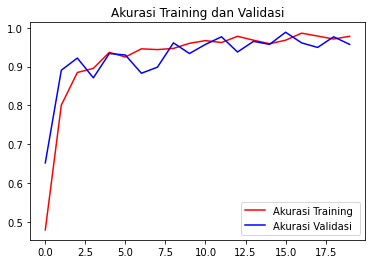

<Figure size 432x288 with 0 Axes>

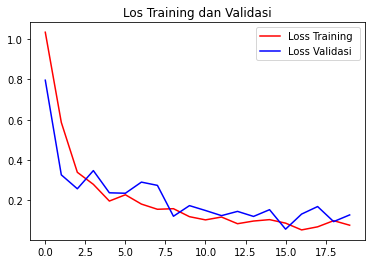

<Figure size 432x288 with 0 Axes>

In [ ]:
   
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))                                                          #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

plt.plot(epochs, loss, 'r', label='Loss Training ')                               #Plot nilai akurasi training                     
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')                            #Plot nilai akurasi validasi
plt.title('Los Training dan Validasi')                                            #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

# Uji Gambar Model Klasifikasi Gambar 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 1MOm36DHK0R8OfIC.png to 1MOm36DHK0R8OfIC.png
1MOm36DHK0R8OfIC.png
rock


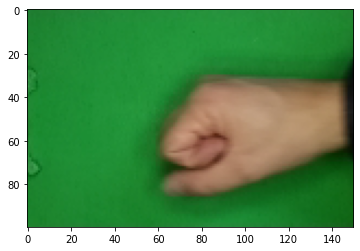

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')